In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_csv("/kaggle/input/netflix/netflix_titles.csv",encoding = "ISO-8859-1")
print(df)


                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019     

In [3]:
df.describe()



,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [4]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [5]:
df['Premiere'] = pd.to_datetime(df['Premiere'], format='mixed')

# columns year, month and weekday
df['year']    = df['Premiere'].dt.year
df['month']   = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()

In [6]:
df.head()
     

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday


In [7]:
df_temp = df.groupby(['Runtime', 'Title', 'Language']).size().reset_index(name='Count')
df_temp = df_temp.sort_values(by='Runtime', ascending=False).iloc[:, :3]

In [8]:

fig = px.box(df, x= 'Runtime', hover_data = df[['Title','Language']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [9]:

df_doc = df[ ((df["year"]== 2019) |
              ((df["year"]== 2020) & ((df["month"] ==("January"))| (df["month"] ==("February"))| (df["month"] ==("March"))| (df["month"] ==("April")) | (df["month"] ==("May")) | (df["month"] ==("June")))) ) 
              & (df["Genre"]== "Documentary")  ]
#df_doc

In [10]:

fig = px.scatter(df_doc, x='year', y='IMDB Score',color="month")
fig.update_traces(marker_size=10)
fig.show()

In [12]:

top_imdb_english = df[df['Language'] == "English"]
top_imdb_english = top_imdb_english.sort_values(by="IMDB Score", ascending=False).head(10)
top_imdb_english[['Title', 'Genre', 'IMDB Score']]  # Display only relevant columns
top_imdb_english

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,October,Sunday
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,December,Sunday
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,December,Monday
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,2020,May,Wednesday
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,2019,October,Wednesday
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,2017,November,Friday
574,Seaspiracy,Documentary,2021-03-24,89,8.2,English,2021,March,Wednesday
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English,2019,November,Friday
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English,2020,June,Friday
571,13th,Documentary,2016-10-07,100,8.2,English,2016,October,Friday


In [13]:
df_hindi = df[df["Language"] == "Hindi"]
df_hindi.Runtime.value_counts()
df_hindi.Runtime.mean()

115.78787878787878

In [14]:
df['Genre'].value_counts()
df['Genre'].value_counts().sum()
genre =df['Genre'].value_counts()

In [15]:
genre

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

In [16]:

fig = px.bar(genre, x= genre.index, y=genre.values, labels={'y':'Number of Movies from the Genre', 'index':'Genres'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [17]:

# printing unique values of Language
df.Language.unique()
df.Language.value_counts()
     

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georg

In [18]:

df_top_lang = df.Language.value_counts().nlargest(3)

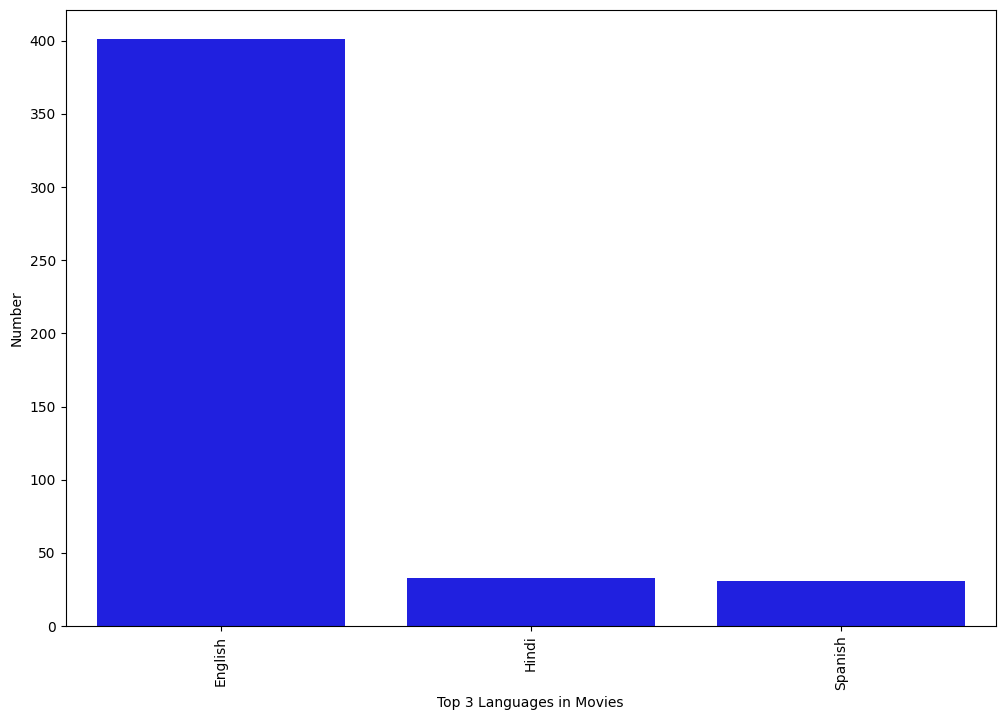

In [19]:

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_top_lang.index,y=df_top_lang.values,data=df,color='blue')
plt.xlabel('Top 3 Languages in Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

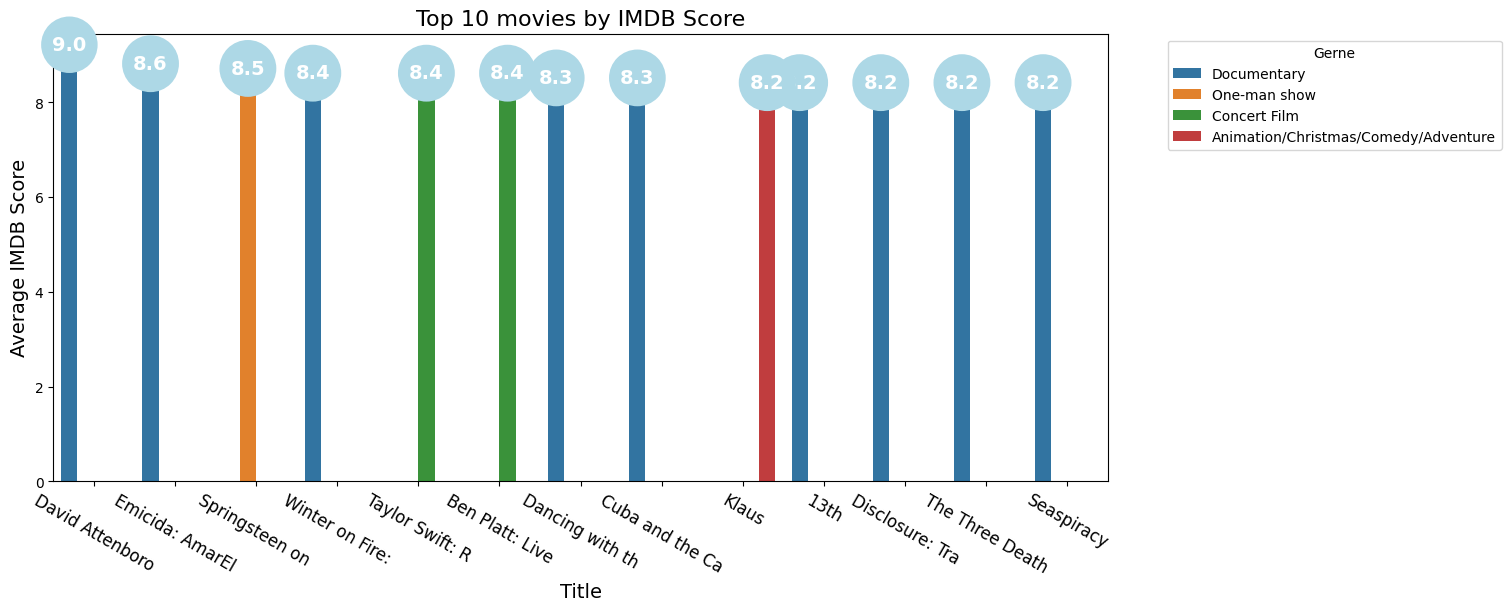

In [20]:
df_temp=df.sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:13,:]

fig, ax = plt.subplots(1,1, figsize = (15, 6), constrained_layout = True)
ax = sns.barplot(x = 'Title', y = 'IMDB Score', data = df_temp, hue = 'Genre')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.1,
            s = f"{i.get_height()}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="circle,pad=0.5", fc='lightblue', ec="lightblue", lw=2))


ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Title'].unique()], fontsize=12, rotation = -30)
plt.title('Top 10 movies by IMDB Score', fontsize=16)
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left');

In [21]:

df[['IMDB Score','Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [22]:

fig = px.scatter(df, x='IMDB Score', y='Runtime')
fig.show()

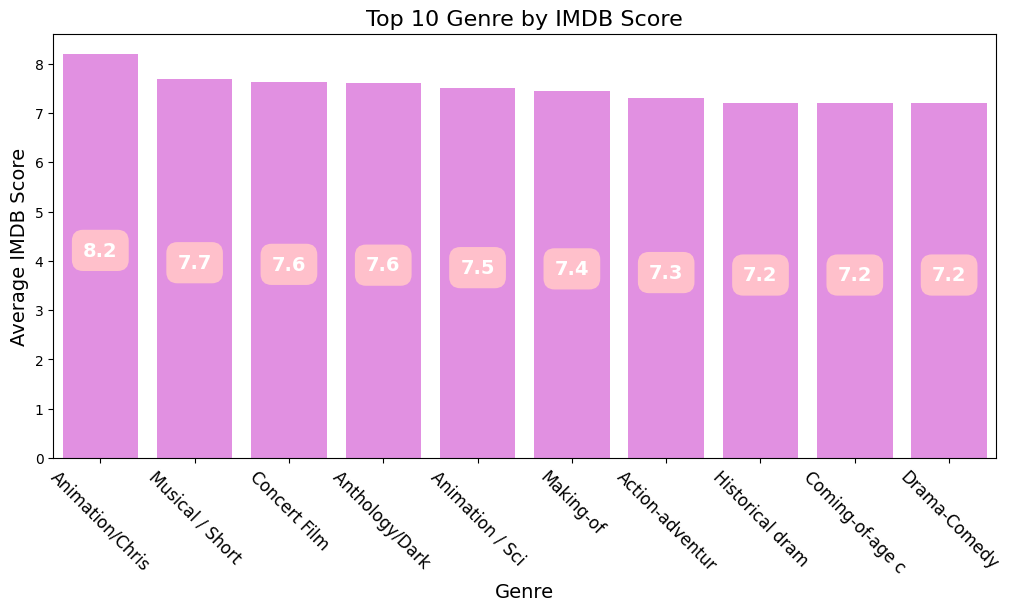

In [23]:

df_temp=df.groupby(['Genre']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Genre', y = 'IMDB Score', data = df_temp, color = 'violet')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Genre'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Genre by IMDB Score', fontsize=16);
     

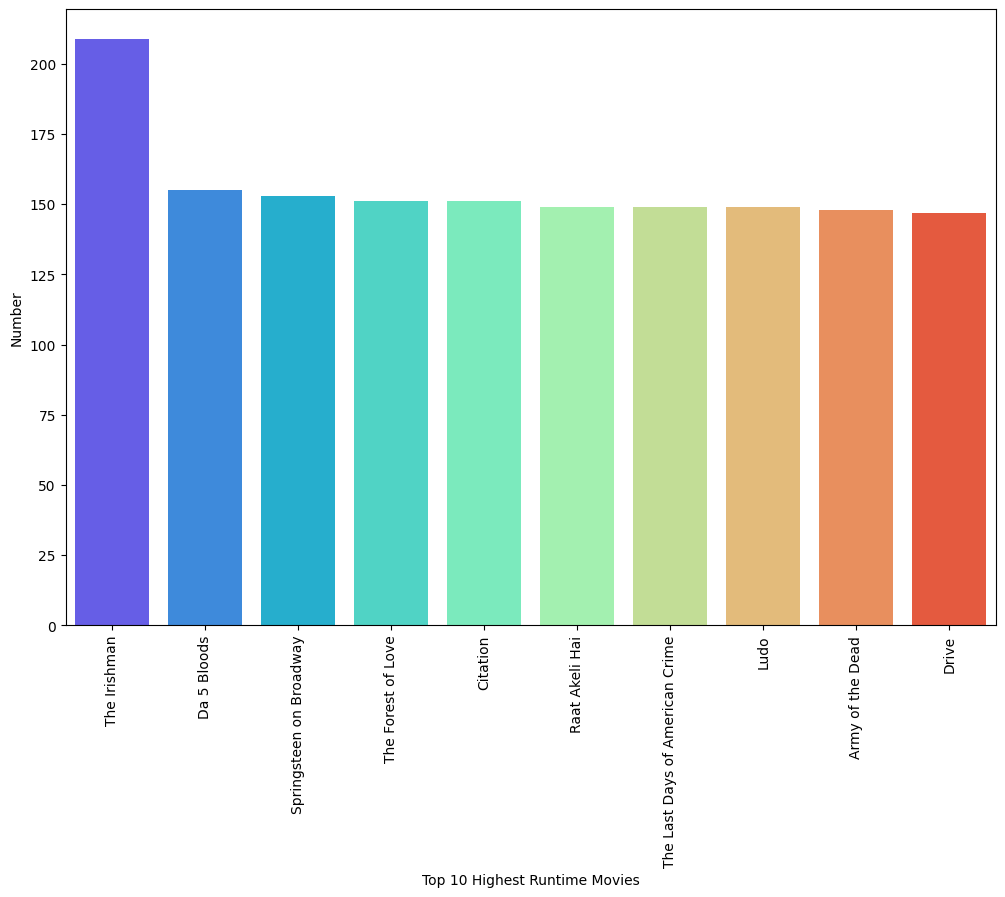

In [24]:
df_temp=df.groupby(['Title']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp["Title"],y=df_temp["Runtime"],data=df,palette='rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

In [26]:
genre_lang =[]
for i in df.Language.unique():
    df_lang =df[df["Language"]==i]
    df_lang_genre =df_lang.Genre.value_counts().nlargest(1)
    #print(f'*************************************************')
    #print(f'Language: {i}\n', df_lang_genre)
    genre_lang.append((i,df_lang_genre))

In [27]:

df_lang = pd.DataFrame(genre_lang, columns = ['Language', 'Genre'])
df_lang.sort_values(by=['Language'],ignore_index=True)

,Language,Genre
0,Bengali,"Genre Documentary 1 Name: count, dtype: int64"
1,Dutch,"Genre Romantic comedy 1 Name: count, dtype:..."
2,English,"Genre Documentary 120 Name: count, dtype: i..."
3,English/Akan,"Genre War drama 1 Name: count, dtype: int64"
4,English/Arabic,"Genre Documentary 1 Name: count, dtype: int64"
5,English/Hindi,"Genre Documentary 2 Name: count, dtype: int64"
6,English/Japanese,"Genre Documentary 1 Name: count, dtype: int64"
7,English/Korean,"Genre Action-adventure 1 Name: count, dtype..."
8,English/Mandarin,"Genre Documentary 2 Name: count, dtype: int64"
9,English/Russian,"Genre Documentary 1 Name: count, dtype: int64"


In [28]:

fig = px.scatter(x=df['Runtime'], y=df['Title'])
fig.show()